In [1]:
import pandas as pd
import numpy as np
import warnings
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
cols = ['Year','Tourn.#','Course_#','Round','Hole',
        'Player_#','Shot','Hole_Score','X_Coordinate','Distance',
        'Y_Coordinate','Z_Coordinate','#_of_Strokes','Permanent_Tournament_#',
        'Shot_Type(S/P/D)','From_Location(Scorer)','To_Location(Scorer)']

In [25]:
to_concat = []
for yr in range(2003,2014):
    cols_ = cols + ['To_Location(Laser)'] if yr==2003 else cols
    data = pd.read_csv('./../data/rawdata/%d.txt' % yr, sep=';',
                       usecols=lambda x: x.strip().replace(' ','_') in cols_)
    data.columns = [col.strip().replace(' ','_') for col in data.columns]
    if yr==2003:
        data = data.rename(columns={'To_Location(Laser)':'To_Location(Scorer)'})
    to_concat.append(data)

In [26]:
data = pd.concat(to_concat)

In [45]:
data['X_Coordinate'] = [str(i).replace(' ','') for i in data['X_Coordinate']]
data['Y_Coordinate'] = [str(i).replace(' ','') for i in data['Y_Coordinate']]
data['Z_Coordinate'] = [str(i).replace(' ','') for i in data['Z_Coordinate']]
data['X_Coordinate'] = [str(i).replace(',','') for i in data['X_Coordinate']] 
data['Y_Coordinate'] = [str(i).replace(',','') for i in data['Y_Coordinate']]
data['Z_Coordinate'] = [str(i).replace(',','') for i in data['Z_Coordinate']]
data['X_Coordinate'] = ['-' + str(i)[:-1] if str(i)[-1]=='-' else i for i in data['X_Coordinate']] 
data['Y_Coordinate'] = ['-' + str(i)[:-1] if str(i)[-1]=='-' else i for i in data['Y_Coordinate']]
data['Z_Coordinate'] = ['-' + str(i)[:-1] if str(i)[-1]=='-' else i for i in data['Z_Coordinate']]
data['X_Coordinate'] = pd.to_numeric(data['X_Coordinate'])
data['Y_Coordinate'] = pd.to_numeric(data['Y_Coordinate'])
data['Z_Coordinate'] = pd.to_numeric(data['Z_Coordinate'])

In [27]:
data.columns

Index([u'Year', u'Tourn.#', u'Player_#', u'Course_#',
       u'Permanent_Tournament_#', u'Round', u'Hole', u'Hole_Score', u'Shot',
       u'Shot_Type(S/P/D)', u'#_of_Strokes', u'From_Location(Scorer)',
       u'To_Location(Scorer)', u'Distance', u'X_Coordinate', u'Y_Coordinate',
       u'Z_Coordinate'],
      dtype='object')

In [28]:
data['#_of_Strokes'].value_counts()

1    12960484
0       84754
2         223
Name: #_of_Strokes, dtype: int64

In [29]:
data['Shot_Type(S/P/D)'].value_counts()

S     12888486
D        80195
P        71666
Pr        4553
U          559
C            2
Name: Shot_Type(S/P/D), dtype: int64

In [30]:
data['From_Location(Scorer)'].value_counts(dropna=False)

Green                 5314818
Tee Box               3292419
Fairway               2174238
Primary Rough         1030020
Intermediate Rough     320804
Green Side Bunker      301029
Fringe                 243870
Unknown                147939
Fairway Bunker         145811
Native Area             49971
Other                   18941
NaN                      3824
Water                     917
Grass Bunker              860
Name: From_Location(Scorer), dtype: int64

In [31]:
data['To_Location(Scorer)'].value_counts(dropna=False)

Green                 5115936
NaN                   3746209
Fairway               2195607
Primary Rough         1007397
Intermediate Rough     293219
Green Side Bunker      289344
Fairway Bunker         135056
Fringe                 110396
Water                   46889
Unknown                 40790
Native Area             18653
Tree Outline            14441
Dirt Outline             8843
Tee Box                  6833
Waste Bunker             5377
Other                    4713
Cart Path                3416
Grass Bunker              700
Bush                      478
Rock Outline              423
Landscaping               204
Wall                      190
Water Drop                154
Walk Strip                118
Bridge                     53
Path                       12
Building                   10
Name: To_Location(Scorer), dtype: int64

In [32]:
print data.shape[0]
data = data[data['Permanent_Tournament_#']!=470]
print data.shape[0]

13045461
13045461


In [33]:
data.groupby('Shot_Type(S/P/D)')['#_of_Strokes'].value_counts()

Shot_Type(S/P/D)  #_of_Strokes
C                 1                      2
D                 0                  80195
P                 1                  71443
                  2                    223
Pr                0                   4553
S                 1               12888480
                  0                      6
U                 1                    559
Name: #_of_Strokes, dtype: int64

In [10]:
data.loc[data['Shot_Type(S/P/D)']=='C']

,Shot,Z_Coordinate,Course_#,Distance,From_Location(Scorer),Hole,Hole_Score,Permanent_Tournament_#,Player_#,Round,Shot_Type(S/P/D),To_Location(Laser),Tourn.#,X_Coordinate,Y_Coordinate,Year,#_of_Strokes
445915,1,98.897,699,7796,Tee Box,13,3,20,1127,2,C,NaN,170,"6,814.5580","7,974.0810",2004,1
1082920,2,462.369,625,216,Green,13,3,41,28486,1,C,NaN,410,"8,137.4460","12,414.2960",2005,1


In [11]:
data[cols].head(3)

,Year,Tourn.#,Course_#,Round,Hole,Player_#,Shot,Hole_Score,X_Coordinate,Distance,Y_Coordinate,Z_Coordinate,#_of_Strokes,Permanent_Tournament_#,Shot_Type(S/P/D),From_Location(Scorer),To_Location(Laser)
0,2003,10,656,1,1,1320,1,4,.0000,0,.0000,0,1,16,S,Tee Box,Fairway
1,2003,10,656,1,1,1320,2,4,.0000,0,.0000,0,1,16,S,Fairway,Green
2,2003,10,656,1,1,1320,3,4,.0000,0,.0000,0,1,16,S,Green,Green


In [75]:
id_cols = ['Permanent_Tournament_#','Year','Player_#','Round','Hole']
more_shots_than_score_holes = set(tuple(tup) for tup in data[(data.Shot>data.Hole_Score)][id_cols].values.tolist())
provisional_holes = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='Pr',id_cols].values.tolist())
unplayed_provisional_holes = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='U',id_cols].values.tolist())
penalty_holes = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='P',id_cols].values.tolist())
drop_holes = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='D',id_cols].values.tolist())
sets = [more_shots_than_score_holes,provisional_holes,unplayed_provisional_holes,
        penalty_holes,drop_holes]

In [76]:
mat = np.zeros((5,5))
for u,s in enumerate(sets):
    for u1,s1 in enumerate(sets):
        mat[u,u1] = float(len(s.intersection(s1)))/len(s.union(s1))

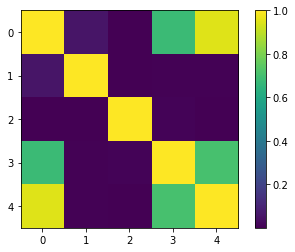

In [77]:
plt.imshow(mat);
plt.colorbar();

In [78]:
def jacard(s1,s2):
    return float(len(s1.intersection(s2)))/len(s1.union(s2))

In [79]:
jacard(penalty_holes.difference(drop_holes),unplayed_provisional_holes)

0.06634662727720335

In [81]:
len(unplayed_provisional_holes.difference(penalty_holes))

0

In [80]:
provisional_holes.difference(more_shots_than_score_holes)

{(37, 2006, 29533, 1, 8), (56, 2005, 12652, 3, 9)}

In [92]:
holes_with_unplayed_provisionals = [tuple(tup) in unplayed_provisional_holes for tup in data[id_cols].values]
holes_with_provisionals = [tuple(tup) in provisional_holes for tup in data[id_cols].values]

In [93]:
np.mean(holes_with_unplayed_provisionals),np.mean(holes_with_provisionals)

(0.00027135875075629754, 0.0021158317057557415)

In [182]:
res = []
for tup,df in data.iloc[holes_with_unplayed_provisionals].groupby(id_cols):
    inds = np.where(df['Shot_Type(S/P/D)'].values=='U')[0]
    for ind in inds:
        res.append(zip(df['Shot_Type(S/P/D)'].values[ind-2 if ind-2>0 else 0:ind+4],
                       df['#_of_Strokes'].values[ind-2 if ind-2>0 else 0:ind+4]))

In [183]:
c = Counter([str(r) for r in res])

In [184]:
c.most_common(7)

[("[('S', 1), ('P', 1), ('U', 1), ('S', 1), ('S', 1), ('S', 1)]", 419),
 ("[('S', 1), ('P', 1), ('U', 1), ('S', 1), ('S', 1)]", 106),
 ("[('S', 1), ('P', 1), ('U', 1), ('S', 1)]", 9),
 ("[('S', 1), ('P', 1), ('U', 1), ('P', 1), ('S', 1), ('S', 1)]", 6),
 ("[('S', 1), ('P', 1), ('U', 1), ('P', 1), ('D', 0), ('S', 1)]", 5),
 ("[('S', 1), ('P', 1), ('U', 1), ('S', 1), ('P', 1), ('D', 0)]", 4),
 ("[('S', 1), ('P', 1), ('U', 1), ('S', 1), ('D', 0), ('S', 1)]", 4)]

In [179]:
res = []
for tup,df in data.iloc[holes_with_provisionals].groupby(id_cols):
    inds = np.where(df['Shot_Type(S/P/D)'].values=='Pr')[0]
    for ind in inds:
        tups = zip(df['Shot_Type(S/P/D)'].values[ind-2 if ind-2>0 else 0:ind+4],
                       df['#_of_Strokes'].values[ind-2 if ind-2>0 else 0:ind+4])
        res.append(tups)

In [180]:
c = Counter([str(r) for r in res])

In [181]:
c.most_common(7)

[("[('S', 1), ('Pr', 0), ('S', 1), ('S', 1), ('S', 1)]", 3470),
 ("[('S', 1), ('Pr', 0), ('P', 1), ('D', 0), ('S', 1)]", 411),
 ("[('S', 1), ('S', 1), ('Pr', 0), ('S', 1), ('S', 1), ('S', 1)]", 223),
 ("[('S', 1), ('Pr', 0), ('S', 1), ('S', 1)]", 143),
 ("[('S', 1), ('Pr', 0), ('D', 0), ('S', 1), ('S', 1)]", 63),
 ("[('S', 1), ('S', 1), ('Pr', 0), ('S', 1), ('S', 1)]", 46),
 ("[('S', 1), ('Pr', 0), ('P', 1), ('S', 1), ('S', 1)]", 40)]

In [185]:
holes_with_penalties = [tuple(tup) in penalty_holes for tup in data[id_cols].values]

In [206]:
res = []
for tup,df in data.iloc[holes_with_penalties].groupby(id_cols):
    inds = np.where(df['Shot_Type(S/P/D)'].values=='P')[0]
    for ind in inds:
        tups = zip(df['Shot_Type(S/P/D)'].values[ind-2 if ind-2>0 else 0:ind+4],
                   df['#_of_Strokes'].values[ind-2 if ind-2>0 else 0:ind+4],
                   df['From_Location(Scorer)'].values[ind-2 if ind-2>0 else 0:ind+4])
        res.append(tups)

In [207]:
c = Counter([str(r) for r in res])

In [193]:
(data.loc[data['Shot_Type(S/P/D)']=='P','X_Coordinate']!=0).sum()

2

In [202]:
(data.loc[data['Shot_Type(S/P/D)']=='D','X_Coordinate']==0).mean()

0.075154311366045265

In [210]:
c.most_common(50)

[("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Primary Rough'), ('S', 1, 'Green')]",
  6873),
 ("[('S', 1, 'Tee Box'), ('S', 1, 'Fairway'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Fairway'), ('S', 1, 'Green')]",
  4681),
 ("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Primary Rough'), ('S', 1, 'Fairway')]",
  4433),
 ("[('S', 1, 'Tee Box'), ('S', 1, 'Fairway'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Primary Rough'), ('S', 1, 'Green')]",
  3807),
 ("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Fairway'), ('S', 1, 'Green')]",
  3371),
 ("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Other'), ('S', 1, 'Green')]",
  2875),
 ("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Primary Rough'), ('S', 1, 'Primary Rough')]",
  2641),
 ("[('S', 1, 'Tee Box'), ('P', 1, 'Unknown'), ('D', 0, 'Unknown'), ('S', 1, 'Intermediate Rough'), (

In [36]:
id_cols = ['Permanent_Tournament_#','Year','Player_#','Round','Hole']
holes_with_provisionals = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='Pr',id_cols].values.tolist())
holes_with_unplayed_provisionals = set(tuple(tup) for tup in data.loc[data['Shot_Type(S/P/D)']=='U',id_cols].values.tolist())

In [37]:
holes_with_provisionals = [tuple(tup) in holes_with_provisionals for tup in data[id_cols].values]
holes_with_unplayed_provisionals = [tuple(tup) in holes_with_unplayed_provisionals for tup in data[id_cols].values]

In [49]:
def gen():
    for tup,df in data.iloc[holes_with_unplayed_provisionals].groupby(id_cols):
        yield df

In [50]:
g = gen()

In [71]:
d = next(g).copy()

In [73]:
d

,Year,Tourn.#,Player_#,Course_#,Permanent_Tournament_#,Round,Hole,Hole_Score,Shot,Shot_Type(S/P/D),#_of_Strokes,From_Location(Scorer),To_Location(Scorer),Distance,X_Coordinate,Y_Coordinate,Z_Coordinate
234365,2006,80,9011,101,1,2,9,7,1,S,1,Tee Box,Intermediate Rough,9038,7642.008,7386.883,2459.607
234366,2006,80,9011,101,1,2,9,7,2,S,1,Intermediate Rough,Primary Rough,7631,7006.320,7370.390,2468.020
234367,2006,80,9011,101,1,2,9,7,3,P,1,Unknown,NaN,0,0.000,0.000,0.000
234368,2006,80,9011,101,1,2,9,7,4,U,1,Intermediate Rough,Intermediate Rough,1167,7090.591,7418.893,2467.873
234369,2006,80,9011,101,1,2,9,7,5,S,1,Primary Rough,Green,800,7106.690,7483.556,2468.003
234370,2006,80,9011,101,1,2,9,7,6,S,1,Green,Green,193,7105.125,7467.512,2467.860
234371,2006,80,9011,101,1,2,9,7,7,S,1,Green,NaN,19,0.000,0.000,0.000


In [74]:
d = d[d.X_Coordinate!=0]

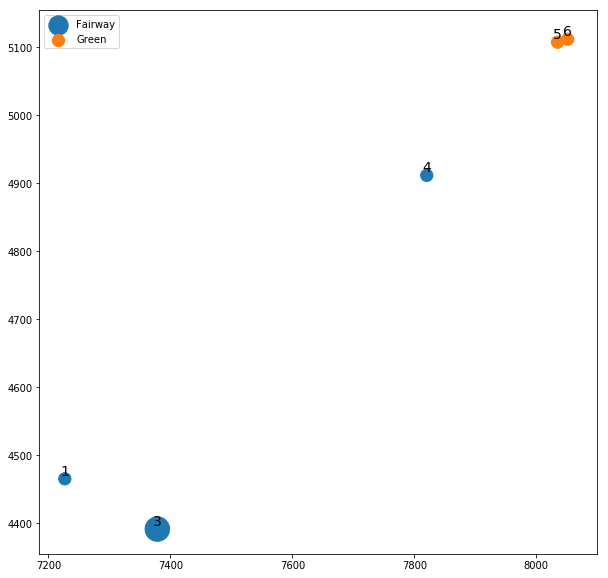

In [54]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
for turf,df in d.groupby('To_Location(Scorer)'):
    ax.scatter(df.X_Coordinate,df.Y_Coordinate,label = turf,s=[600 if st=='U' else 150 
                                                               for st in df['Shot_Type(S/P/D)']])
    for row_ind,row in df.iterrows():
        ax.text(row.X_Coordinate,row.Y_Coordinate+5,s=row.Shot,
                horizontalalignment='center',fontsize=14)
plt.legend();

In [245]:
data.loc[data['Shot_Type(S/P/D)']=='Pr','#_of_Strokes']

#_of_Strokes    0
#_of_Strokes    0
dtype: int64

In [107]:
data['penalty_strokes'] = 0

Process:
- Drop non-stroke play events
- Drop holes with conceded strokes
- Drop 'Pr' Shots
- Drop holes with 'S' Shots with #_of_Strokes = 0
- Impute tee, hole locations for each round, save results for later
- Add 5 columns of zeros - Starting Location X, Y, Z Coordinates, "start location equal to end location" flag, and penalty shots
- Look for S-P-U sequences
    - Add 1 penalty shot to S before P
    - Set "start location equal to end location" flag equal to 1 for S
    - Drop P 
    - Make U = S
- Look for S-P-D-S sequences
    - If D has Coordinates equal to 0, set end coordinate columns of first S to NA, skip.
    - Else, Add 1 penalty shot to first S
    - Set End coordinates columns of first S equal to coordinate columns of D
    - Set Start location of second S equal to coordinate columns of D
    - Drop P, Drop D
- Drop rest of non-'S' Shots
- Set start location of first shot on each hole to imputed tee location, end location of last shot on each hole to imputed hole location.
- Set start location of each shot to end location of shot before in sequence
- Drop all shots with any Coordinate column equal to 0.

In [68]:
data.loc[(data['Shot_Type(S/P/D)']=='P') & (data.Shot==1)]

,Year,Tourn.#,Course_#,Round,Hole,Player_#,Shot,Hole_Score,X_Coordinate,Y_Coordinate,Z_Coordinate,#_of_Strokes,Shot_Type(S/P/D),From_Location(Scorer),To_Location(Laser)
35661,2003,20,6,4,1,1139,1,6,.0000,.0000,.0000,2,P,Unknown,NaN
412323,2003,170,699,1,10,1713,1,7,.0000,.0000,0,2,P,Unknown,NaN


In [ ]:
data.loc[data['Shot_Type(S/P/D)']=='P',id_cols+['Shot']]

In [64]:
data[(data['Shot_Type(S/P/D)']=='P') & (data.penalty_strokes!=0)][cols]

,Year,Tourn.#,Course_#,Round,Hole,Player_#,Shot,Hole_Score,X_Coordinate,Y_Coordinate,Z_Coordinate,#_of_Strokes,Shot_Type(S/P/D),From_Location(Scorer),To_Location(Laser)
44074,2003,30,510,1,17,2239,3,6,.0000,.0000,.0000,1,P,Unknown,NaN
44913,2003,30,510,1,17,6595,3,5,.0000,.0000,.0000,1,P,Unknown,NaN
132635,2003,60,4,1,16,6475,2,5,.0000,.0000,0,1,P,Unknown,NaN


In [37]:
data.iloc[suspect]['From_Location(Scorer)'].value_counts(dropna=False)

Unknown               12843
Green                 11313
Tee Box                7621
Primary Rough          5297
Fairway                4494
Intermediate Rough     1297
Other                   966
Native Area             683
Green Side Bunker       550
Fringe                  447
Fairway Bunker          294
NaN                      31
Water                    29
Name: From_Location(Scorer), dtype: int64

In [36]:
data.iloc[suspect]['To_Location(Scorer)'].value_counts(dropna=False)

NaN                   17048
Green                  9909
Primary Rough          5446
Fairway                4277
Water                  3901
Intermediate Rough     1153
Native Area             785
Tee Box                 648
Unknown                 541
Green Side Bunker       475
Tree Outline            459
Fringe                  384
Cart Path               375
Fairway Bunker          274
Dirt Outline            117
Rock Outline             41
Landscaping              13
Wall                     10
Bush                      4
Path                      4
Other                     1
Name: To_Location(Scorer), dtype: int64

In [61]:
for year in range(2004,2017):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        data = pd.read_csv('./../data/rawdata/%d.txt' % year, sep=';')
    data.columns = [col.strip().replace(' ','_') for col in data.columns]
    ## converting all coords to str to strip out white space
    data['X_Coordinate'] = [str(i).replace(' ','') for i in data['X_Coordinate']]
    data['Y_Coordinate'] = [str(i).replace(' ','') for i in data['Y_Coordinate']]
    data['Z_Coordinate'] = [str(i).replace(' ','') for i in data['Z_Coordinate']]
    
    ## getting rid of commas
    data['X_Coordinate'] = [str(i).replace(',','') for i in data['X_Coordinate']] 
    data['Y_Coordinate'] = [str(i).replace(',','') for i in data['Y_Coordinate']]
    data['Z_Coordinate'] = [str(i).replace(',','') for i in data['Z_Coordinate']]
    
    ## placing negative signs in proper place
    data['X_Coordinate'] = ['-' + str(i)[:len(str(i))-1] if str(i)[len(str(i))-1]=='-' else i for i in data['X_Coordinate']] 
    data['Y_Coordinate'] = ['-' + str(i)[:len(str(i))-1] if str(i)[len(str(i))-1]=='-' else i for i in data['Y_Coordinate']]
    data['Z_Coordinate'] = ['-' + str(i)[:len(str(i))-1] if str(i)[len(str(i))-1]=='-' else i for i in data['Z_Coordinate']]
    
    ## converting to number
    data['X_Coordinate'] = pd.to_numeric(data['X_Coordinate'])
    data['Y_Coordinate'] = pd.to_numeric(data['Y_Coordinate'])
    data['Z_Coordinate'] = pd.to_numeric(data['Z_Coordinate'])
    
    print year
    print 'Starting size: %d' % (len(data),)
    deduped = data.drop_duplicates(['Permanent_Tournament_#','Course_#','Round','Hole','Player_#','Shot_Type(S/P/D)'])
    d =  deduped.groupby(['Permanent_Tournament_#','Course_#','Round','Hole','Player_#'])['Shot_Type(S/P/D)'].count().to_dict()
    just_shots = set(key for key,value in d.iteritems() if value==1)
    to_drop = [tuple(tup) in just_shots
               for tup in data[['Permanent_Tournament_#','Course_#','Round','Hole','Player_#']].values.tolist()]
    print 'Player holes with just shots: %d' % (sum(to_drop),)
    data = data.iloc[to_drop]
    print 'Data points with Shot value still greater than hole score: %d' % (len(data[(data.Shot>data.Hole_Score)]),)
    
    
    zeros = data[(data.Shot!=data.Hole_Score) & ((data['X_Coordinate']==0) | (data['Y_Coordinate']==0) | (data['Z_Coordinate']==0))]
    
    print 'Data points with Zero Coordinates after drop: %d' % (len(zeros),)

    print 'Strokes Gained Estimated of zeros: %d' % ((zeros['Strokes_Gained/Baseline']!=0).sum(),)

2004
Starting size: 1272874
Player holes with just shots: 1223508
Data points with Shot value still greater than hole score: 0
Data points with Zero Coordinates after drop: 82847
Strokes Gained Estimated of zeros: 357
2005
Starting size: 1279833
Player holes with just shots: 1229519
Data points with Shot value still greater than hole score: 0
Data points with Zero Coordinates after drop: 72030
Strokes Gained Estimated of zeros: 530
2006
Starting size: 1298010
Player holes with just shots: 1243881
Data points with Shot value still greater than hole score: 0
Data points with Zero Coordinates after drop: 88624
Strokes Gained Estimated of zeros: 745
2007
Starting size: 1211721
Player holes with just shots: 1160054
Data points with Shot value still greater than hole score: 1
Data points with Zero Coordinates after drop: 68021
Strokes Gained Estimated of zeros: 477
2008
Starting size: 1206071
Player holes with just shots: 1151735
Data points with Shot value still greater than hole score: 2
D